# Datenanalyse mit KI & Machine Learning
## Einfache lineare Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
# So könnte eine lineare Regression ablaufen:
# https://miro.medium.com/v2/resize:fit:828/1*nhGPRU12caIw7NK5Rr3p-w.gif
# Quelle: https://medium.com/swlh/from-animation-to-intuition-linear-regression-and-logistic-regression-f641a31e1caf

## Datensatz in X und y einteilen

In [2]:
taxis = sns.load_dataset("taxis")
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [3]:
# Definieren der Modellvariablen
# X - unabhängige Variable(n), mit denen wir Vorhersagen treffen
# y - abhängige Variable, die wir vorhersagen wollen
X = taxis[["distance"]]
y = taxis["total"]

In [4]:
X

,distance
0,1.60
1,0.79
2,1.37
3,7.70
4,2.16
...,...
6428,0.75
6429,18.74
6430,4.14
6431,1.12


In [5]:
y

0       12.95
1        9.30
2       14.16
3       36.95
4       13.40
        ...  
6428     6.36
6429    58.80
6430    17.30
6431     6.80
6432    20.16
Name: total, Length: 6433, dtype: float64

## Einfaches Splitten der Daten in train und test

In [6]:
# Parameter random_state, wenn Reproduzierbarkeit gewünscht ist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,distance
915,5.50
1630,0.54
5865,4.88
3209,2.10
509,0.91
...,...
3772,1.47
5191,2.26
5226,0.90
5390,4.64


In [8]:
X_test

,distance
4092,1.30
6282,1.40
3237,2.39
1891,1.90
5010,2.40
...,...
4874,3.90
6290,2.00
151,6.71
2439,1.60


In [12]:
y_test

3941    12.30
4104    12.36
4909    11.15
3269    38.16
4630    16.56
        ...  
5626     7.80
33      10.79
1512    12.80
5412    26.16
4605    14.12
Name: total, Length: 644, dtype: float64

## Split in Trainings-, Validierungs- und Testdatensatz

In [11]:
# Erzeugen von Trainingsdaten und temporären Daten (zum Weitersplitten)
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.1

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_ratio, random_state=42)

# Erzeugen von Test- und Validierungsdaten
test_size = test_ratio / (test_ratio + validation_ratio)
# print(test_size)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size, random_state=42)

In [13]:
X_train.shape[0]

4824

In [14]:
len(X_train)

4824

In [15]:
# Hat unser Split funktioniert?
alle_daten = len(X)
print(f"Der Trainingsdatensatz enthält {len(X_train) / alle_daten:.1%} der Daten.")
print(f"Der Validierungsdatensatz enthält {len(X_val) / alle_daten:.1%} der Daten.")
print(f"Der Testdatensatz enthält {len(X_test) / alle_daten:.1%} der Daten.")
# Alternativ shape[0]

Der Trainingsdatensatz enthält 75.0% der Daten.
Der Validierungsdatensatz enthält 15.0% der Daten.
Der Testdatensatz enthält 10.0% der Daten.


## Einfache lineare Regression

### Wird verwendet, wenn nur eine x-Variable für Regression genutzt wird

#### Hier: Können wir nur mit der distance Variable voraussagen, wie teuer unsere Taxifahrt wird?

In [16]:
# Modelltyp definieren
model = LinearRegression()

# Berechnung der Parameter
model.fit(X=X_train.values, y=y_train)

LinearRegression()

In [17]:
# Koeffizient von distance
print(model.coef_.item())

# Schnittpunkt mit der y-Achse (Konstante)
print(model.intercept_)

3.292669378764966
8.56775056143276


Ausgangsgleichung:
y = a + b * x

Interpretation:
a = 8.57 = Bei einer Distanz von 0km Fahrtstrecke beträgt der Rechnungsbetrag 8.57 Dollar.
--> ACHTUNG: INTERCEPT NICHT IMMER INTERPRETIERBAR! Nur dann, wenn unsere X-Variablen sich bis 0 erstrecken, kann der Intercept logisch interpretiert werden.

b = 3.29 = Steigt die Distanz um 1, steigt der Rechnungsbetrag um 3.29; Anders formuliert: Pro km Fahrstrecke zahlen wir 3.29$ mehr.

### Regression können wir jetzt visualisieren

In [18]:
# Maximal- und Minimalwert unserer X_Daten herausfinden
max_X_train = max(X_train["distance"])
min_X_train = min(X_train["distance"])

print("Max:", max_X_train)
print("Min:", min_X_train)

Max: 36.7
Min: 0.0


In [19]:
# Mithilfe von Modell Vorhersagen für maximalen und minimalen Wert von X erstellen
prediction = model.predict([[min_X_train], [max_X_train]])
prediction

array([  8.56775056, 129.40871676])

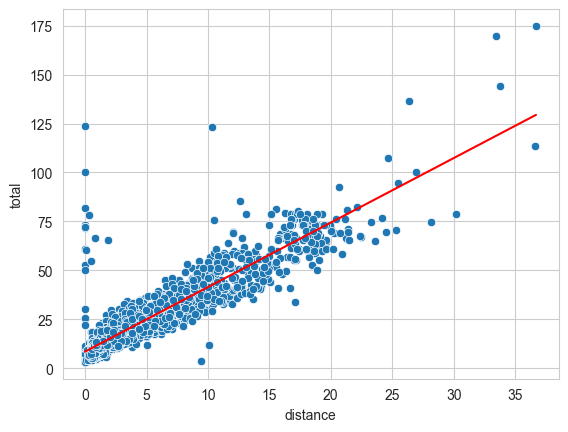

In [20]:
# Scatterplot erstellen mit Punkten aus Trainingsdatensatz und Regressionsgeraden
sns.scatterplot(x=X_train["distance"], y=y_train)
plt.plot([min_X_train, max_X_train], prediction, color="red")
plt.show()

In [22]:
# Wie gut beschreibt unser Modell unsere Trainingsdaten? >>> R²
model.score(X=X_train.values, y=y_train)

0.8270521580231154

## Und wie sieht es jetzt mit unseren Testdaten aus?

In [23]:
# Maximal- und Minimalwert unserer X-Daten herausfinden
max_X_test = max(X_test["distance"])
min_X_test = min(X_test["distance"])

print("Max:", max_X_test)
print("Min:", min_X_test)

Max: 28.3
Min: 0.0


In [24]:
# Mithilfe von Modell Vorhersagen für maximalen und minimalen Werte von X erstellen
prediction = model.predict([[min_X_test], [max_X_test]])
prediction

array([  8.56775056, 101.75029398])

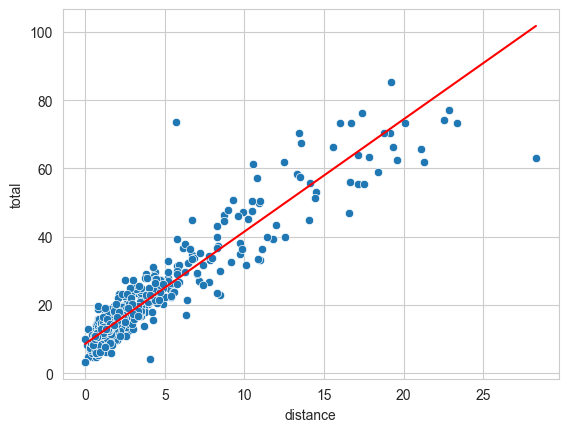

In [25]:
# Scatterplot mit Regressionslinie erzeugen
sns.scatterplot(x=X_test["distance"], y=y_test)
plt.plot([min_X_test, max_X_test], prediction, color="red")
plt.show()

In [26]:
# Wie gut beschreibt unser Modell unsere Testdaten? R²
model.score(X=X_test.values, y=y_test)

0.880772975552619

In [53]:
# Unser Modell beschreibt unsere Variable schon ziemlich gut!

# Alternativ: mit statsmodel

In [55]:
# Konstante in Modell festlegen
constant = sm.add_constant(X_train["distance"])

# Modell erstellen
model_OLS = sm.OLS(y_train, constant)
ergebnis = model_OLS.fit()

print(ergebnis.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 2.306e+04
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:29:29   Log-Likelihood:                -15307.
No. Observations:                4824   AIC:                         3.062e+04
Df Residuals:                    4822   BIC:                         3.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5678      0.106     80.813      0.0

In [56]:
constant

,const,distance
4586,1.0,0.60
809,1.0,2.60
2683,1.0,1.50
6253,1.0,0.75
6219,1.0,5.30
...,...,...
3772,1.0,1.47
5191,1.0,2.26
5226,1.0,0.90
5390,1.0,4.64


### Wann sollten wir statsmodels und wann sklearn verwenden?


#### Statsmodels ist besser für Statistische Auswertungen geeignet, sklearn ist spezialisiert auf Machine Learning, also auf Vorhersagen.

# Übungsaufgabe

### Lade den healthexp-Datensatz aus Seaborn und führe mit sklearn eine einfache lineare Regression durch. Die abhängige Variabel soll dabei die Spalte Life_Expectancy sein. Erstelle je ein Modell, in dem du nur die Spending_USD als unabhängige Variable nutzt und ein anderes Modell, in dem du nur die Spalte Year als unabhängige Variable nutzt.
### Vergleiche am Ende die Scores deiner beiden Modelle.

### Welche Lebenserwartung wird uns im Jahr 2040 vorausgesagt?
### Welche Lebenserwartung wird uns für 3000 Dollar vorhergesagt?

## Mit Year

In [27]:
data = sns.load_dataset('healthexp')
data

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


[72.39424062 82.67938339]


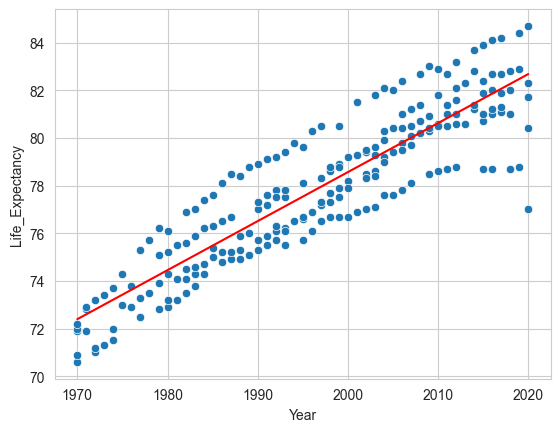

0.8341729409561374

In [38]:
X = data[["Year"]]
y = data["Life_Expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X=X_train.values, y=y_train)

max_X_train = max(X_train["Year"])
min_X_train = min(X_train["Year"])

# print("Max:", max_X_train)
# print("Min:", min_X_train)

prediction = model.predict([[min_X_train], [max_X_train]])
print(prediction)

sns.scatterplot(x=X_train["Year"], y=y_train)
plt.plot([min_X_train, max_X_train], prediction, color="red")
plt.show()

model.score(X=X_test.values, y=y_test)

## Mit Spending_USD

In [30]:
X = data[["Spending_USD"]]
y = data["Life_Expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X=X_train.values, y=y_train)

model.score(X=X_train.values, y=y_train)

0.3291168825295121

## Lässt sich R² bei Taxis steigern? Versuch mit mehr Variablen in X!

In [57]:
taxis.select_dtypes('number')

,passengers,distance,fare,tip,tolls,total
0,1,1.60,7.0,2.15,0.0,12.95
1,1,0.79,5.0,0.00,0.0,9.30
2,1,1.37,7.5,2.36,0.0,14.16
3,1,7.70,27.0,6.15,0.0,36.95
4,3,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...,...
6428,1,0.75,4.5,1.06,0.0,6.36
6429,1,18.74,58.0,0.00,0.0,58.80
6430,1,4.14,16.0,0.00,0.0,17.30
6431,1,1.12,6.0,0.00,0.0,6.80


In [58]:
X = taxis[['distance', 'fare', 'passengers']]
y = taxis['total']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [60]:
# Mit Method Chaining (Methoden-Verkettung)
lm = LinearRegression().fit(X_train, y_train)
lm.score(X_test, y_test)

0.950216812065652

In [ ]:
# R²-Steigerung von 0.88 auf 0.95!

# Übungsaufgabe

### Nutze nun zwei Variablen: Welche Lebenserwartung wird uns im Jahr 2040 mit Year und Spending_USD vorausgesagt?